In [1]:
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop 
from keras.datasets import fashion_mnist

Using TensorFlow backend.


(60000, 28, 28)
(60000,)


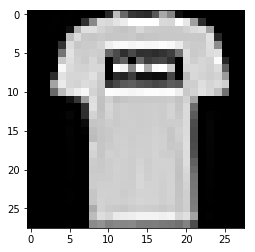

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[1,:],'gray');
plt.show()
# # your code here...
x_trn = np.float32(x_train.reshape((60000,28*28)))*(1/255)
x_tst = np.float32(x_test.reshape(10000,28*28))*(1/255)

y_trn_hot = keras.utils.to_categorical(y_train,num_classes = 10)
y_tst_hot = keras.utils.to_categorical(y_test,num_classes = 10)

M,N =x_tst.shape 


# Minimal layer

In [3]:
M,N =x_tst.shape
model = Sequential([Dense(10,input_shape = (N,)),Activation('softmax')])

sgd = SGD(lr = 0.009,decay = 1e-9,momentum = 0.97,nesterov = True)
model.compile(optimizer = sgd,loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_trn,y_trn_hot,epochs = 10,batch_size = 128)
score = model.evaluate(x_tst,y_tst_hot,batch_size = 128)

print('\n')
print('score :','\n',score)

Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.6099 - acc: 0.7917
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4568 - acc: 0.8440
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4364 - acc: 0.8503
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.4251 - acc: 0.8546
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.4173 - acc: 0.8563
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4123 - acc: 0.8577
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.4075 - acc: 0.8595
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.4045 - acc: 0.8610
Epoch 9/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3999 - acc: 0.8630
Epoch 10/10
10000/10000 [==============================] - 0s 10us/step


score : 
 [0.4405606959819

# one-hidden layer network

In [4]:
model = Sequential()
model.add(Dense(units = 64,activation = 'relu',input_dim = N))
model.add(Dense(10,activation = 'softmax'))

sgd = SGD(lr = 0.009,decay = 1e-9,momentum = 0.98,nesterov = True)
model.compile(optimizer = sgd,loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_trn,y_trn_hot,epochs = 10,batch_size = 128)
score = model.evaluate(x_tst,y_tst_hot,batch_size = 128)

print('\n')
print('score :','\n',score)
classes = model.predict(x_tst, batch_size=128)


Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.5889 - acc: 0.7967
Epoch 2/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.4014 - acc: 0.8576
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3660 - acc: 0.8688
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3409 - acc: 0.8777
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3244 - acc: 0.8829
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3127 - acc: 0.8859
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3050 - acc: 0.8893
Epoch 8/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2915 - acc: 0.8936
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2829 - acc: 0.8965
Epoch 10/10
10000/10000 [==============================] - 0s 10us/step


score : 
 [0.3601895378589

# Freestyle

In [6]:
model = Sequential( )
			
model.add( Dense( units = 1000, activation = 'relu', input_dim = N ) )
model.add( Dropout( 0.1 ) )
model.add( Dense( units = 1000, activation = 'relu', input_dim = N ) )
model.add( Dropout( 0.1 ) )
model.add( Dense( units = 1000, activation = 'relu', input_dim = N ) )
			
model.add( Dense( units = 1000, activation = 'relu', input_dim = N ) )
			
model.add( Dense( 10, activation = 'softmax' ) )
			
sgd = SGD( lr = 0.01, decay = 1e-9, momentum = 0.95, nesterov = True )
model.compile( optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
			
model.fit( x_trn, y_trn_hot, epochs = 10, batch_size = 128 )
score = model.evaluate( x_tst, y_tst_hot, batch_size = 128 )
model.summary( )
		

Epoch 1/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.5683 - acc: 0.7990
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3681 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 54s 898us/step - loss: 0.3352 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 55s 919us/step - loss: 0.3132 - acc: 0.8844
Epoch 5/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.2935 - acc: 0.8901
Epoch 6/10
60000/60000 [==============================] - 53s 888us/step - loss: 0.2811 - acc: 0.8952
Epoch 7/10
60000/60000 [==============================] - 53s 891us/step - loss: 0.2697 - acc: 0.8995
Epoch 8/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.2606 - acc: 0.9030
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2498 - acc: 0.9062
Epoch 10/10
10000/10000 [==============================] - 2s 245us/step
_____________

In [7]:

print('\n')

print('score :','\n',score)




score : 
 [0.32914616014957426, 0.88339999999999996]
